In [1]:
from PIL import Image

In [2]:
path = r"C:\Users\16155\Desktop\Dynamic Ties Research\Dynamic ties website\src\assets\musical-tie.png"

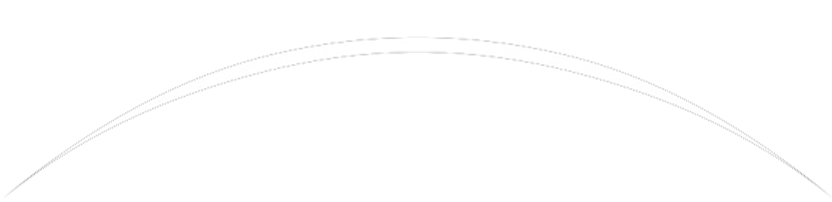

In [5]:
# Load image
img = Image.open(path)

# Set new height while keeping original width
new_height = int(img.height * 1.5)  # squish to 50% height
new_size = (img.width, new_height)

# Resize and save
squished_img = img.resize(new_size)
# squished_img.save(path)
squished_img

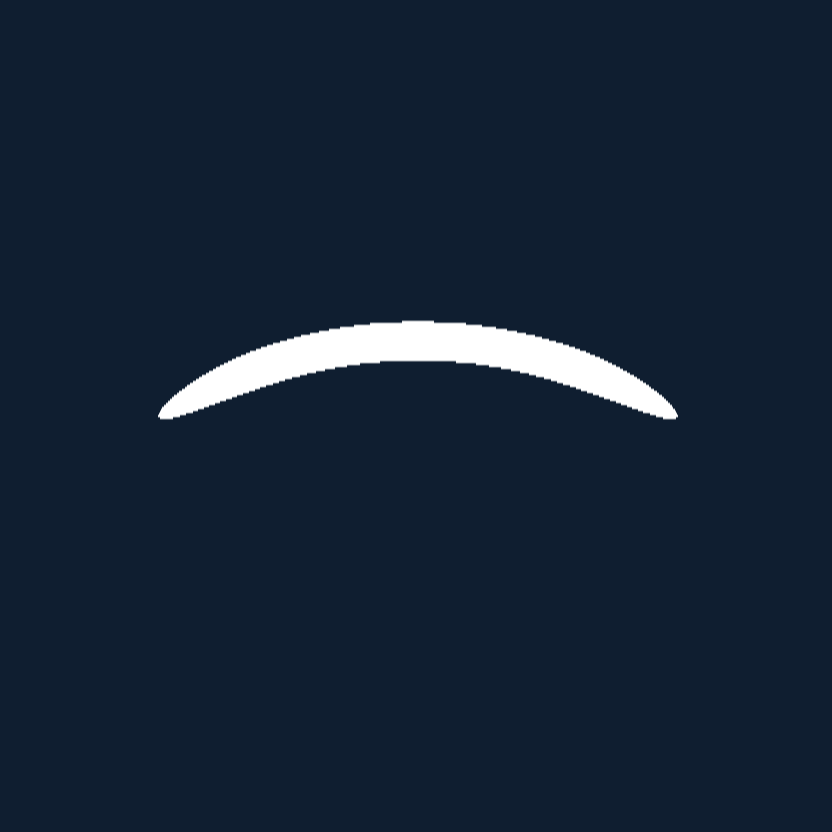

In [16]:
from PIL import Image, ImageFilter, ImageOps

# Load and convert image
img = Image.open(path).convert("RGBA")

# Extract alpha mask
alpha = img.getchannel("A")

# Apply Gaussian blur to thicken edges softly
blurred = alpha.filter(ImageFilter.GaussianBlur(radius=10))  # adjust radius as needed

# Apply a hard threshold: anything > X becomes opaque
threshold = 64  # 0-255, lower = more aggressive thickening
binary_mask = blurred.point(lambda p: 255 if p > threshold else 0)

# Composite thickened white arc
white_arc = Image.new("RGBA", img.size, (255, 255, 255, 255))
thicker_arc = Image.composite(white_arc, Image.new("RGBA", img.size, (0, 0, 0, 0)), binary_mask)

# Resize if desired (squish vertically)
new_height = int(thicker_arc.height * 2)
squished_arc = thicker_arc.resize((thicker_arc.width, new_height))

# Create square background
side = max(squished_arc.width, squished_arc.height)
background = Image.new("RGBA", (side, side), "#0f1e30")  # solid background color

# Paste centered
x = (side - squished_arc.width) // 2
y = (side - squished_arc.height) // 2
background.paste(squished_arc, (x, y), squished_arc)

background



In [34]:
from PIL import Image
import numpy as np
from scipy.ndimage import binary_dilation
from PIL import ImageOps

# Load image with transparency
img = Image.open(path).convert("RGBA")

# Extract alpha (opaque parts = the arc)
alpha = img.getchannel("A")
alpha_np = np.array(alpha)

# Convert to boolean mask: True where arc exists
arc_mask = alpha_np > 0

# Apply dilation (grow the arc)
dilation_iters = 20  # increase for more thickness
dilated_mask = binary_dilation(arc_mask, iterations=dilation_iters)

# Convert back to 8-bit mask
dilated_alpha = Image.fromarray((dilated_mask * 255).astype(np.uint8))

# Create solid white arc using the thickened alpha
white_arc = Image.new("RGBA", img.size, (255, 255, 255, 255))
thicker_arc = Image.composite(white_arc, Image.new("RGBA", img.size, (0, 0, 0, 0)), dilated_alpha)

# (Optional) Squish vertically
new_height = int(thicker_arc.height * 2)
squished_arc = thicker_arc.resize((thicker_arc.width, new_height))

# Create square background
side = max(squished_arc.width, squished_arc.height)
background = Image.new("RGBA", (side, side), "#0f1e30")  # dark background
x = (side - squished_arc.width) // 2
y = (side - squished_arc.height) // 2
background.paste(squished_arc, (x, y), squished_arc)

background.save(r"C:\Users\16155\Desktop\Dynamic Ties Research\Dynamic ties website\public\fav-icon.png")
